In [1]:
import pandas as pd
import numpy as np


In [6]:
data = pd.read_csv("Groceries_dataset.csv",sep=";")

In [7]:
print(data)

       Member_number        Date        itemDescription
0               1808  21-07-2015         tropical fruit
1               2552  05-01-2015             whole milk
2               2300  19-09-2015              pip fruit
3               1187  12-12-2015       other vegetables
4               3037  01-02-2015             whole milk
...              ...         ...                    ...
38760           4471  08-10-2014          sliced cheese
38761           2022  23-02-2014                  candy
38762           1097  16-04-2014               cake bar
38763           1510  03-12-2014  fruit/vegetable juice
38764           1521  26-12-2014               cat food

[38765 rows x 3 columns]


[Text(0.5, 0, 'Date'), Text(0, 0.5, 'Total number of item sold')]

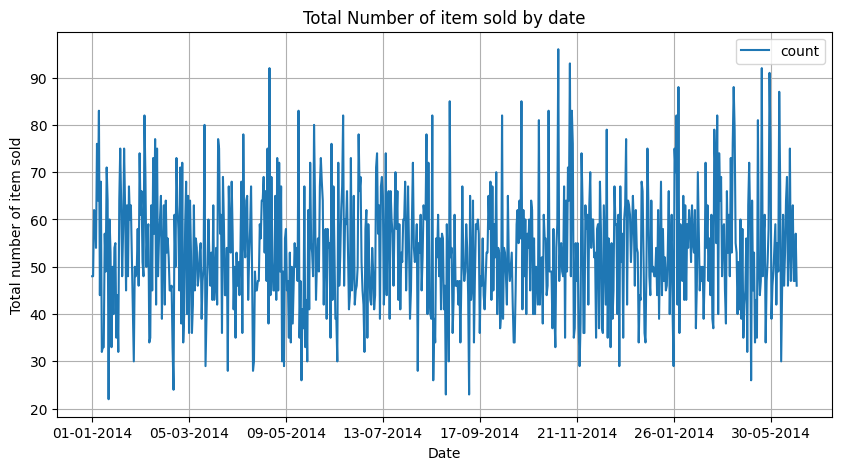

In [10]:
data.groupby(['Date'])['itemDescription'].agg(['count']).plot(figsize=(10,5),grid=True,title='Total Number of item sold by date').set(xlabel='Date',ylabel='Total number of item sold')

In [9]:
data.head()

,Member_number,Date,itemDescription
0,1808,21-07-2015,tropical fruit
1,2552,05-01-2015,whole milk
2,2300,19-09-2015,pip fruit
3,1187,12-12-2015,other vegetables
4,3037,01-02-2015,whole milk


In [11]:
d = data.set_index('Date')

In [12]:
d

,Member_number,itemDescription
Date,,
21-07-2015,1808,tropical fruit
05-01-2015,2552,whole milk
19-09-2015,2300,pip fruit
12-12-2015,1187,other vegetables
01-02-2015,3037,whole milk
...,...,...
08-10-2014,4471,sliced cheese
23-02-2014,2022,candy
16-04-2014,1097,cake bar


In [13]:
d.index = pd.to_datetime(d.index)

/var/folders/cc/rjkbvqgs71qfrlf4s5w7j13c0000gn/T/ipykernel_89385/1735221295.py:1: UserWarning: Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  d.index = pd.to_datetime(d.index)


In [14]:
total_items = len(d)
total_days = len(np.unique(d.index.date))
total_months = len(np.unique(d.index.month))
average_items = total_items / total_days
unique_items = d.itemDescription.unique().size


In [15]:
print(total_items,total_days,total_months,average_items,unique_items)

38765 728 12 53.24862637362637 167


In [16]:
d['Hour'] = d.index.hour
d['Week'] = d.index.weekday +1
d.head(10)

,Member_number,itemDescription,Hour,Week
Date,,,,
2015-07-21,1808,tropical fruit,0,2
2015-01-05,2552,whole milk,0,1
2015-09-19,2300,pip fruit,0,6
2015-12-12,1187,other vegetables,0,6
2015-02-01,3037,whole milk,0,7
2015-02-14,4941,rolls/buns,0,6
2015-05-08,4501,other vegetables,0,5
2015-12-23,3803,pot plants,0,3
2015-03-20,2762,whole milk,0,5


In [21]:
data['Date'].nunique()


728

In [35]:
data['itemDescription'].value_counts()


array([2502, 1898, 1716, 1514, 1334, 1071, 1032,  933,  924,  812,  785,
        744,  731,  717,  687,  662,  596,  580,  571,  566,  566,  534,
        518,  516,  514,  491,  476,  425,  422,  362,  358,  357,  356,
        335,  327,  327,  323,  305,  283,  280,  269,  265,  263,  256,
        254,  252,  251,  240,  238,  227,  225,  220,  220,  219,  212,
        210,  208,  181,  177,  176,  159,  157,  152,  152,  146,  142,
        135,  134,  130,  128,  122,  121,  118,  116,  106,  103,  102,
        100,   98,   93,   92,   92,   89,   85,   82,   82,   80,   79,
         75,   74,   73,   72,   72,   70,   69,   67,   67,   66,   64,
         61,   60,   60,   60,   51,   50,   49,   48,   48,   46,   46,
         45,   44,   42,   41,   40,   40,   38,   37,   35,   34,   33,
         33,   32,   32,   31,   30,   29,   29,   29,   29,   27,   27,
         23,   22,   22,   22,   22,   21,   21,   20,   20,   19,   17,
         17,   17,   16,   16,   15,   15,   13,   

In [40]:
data['itemDescription'].value_counts().keys()


Index(['whole milk', 'other vegetables', 'rolls/buns', 'soda', 'yogurt',
       'root vegetables', 'tropical fruit', 'bottled water', 'sausage',
       'citrus fruit',
       ...
       'whisky', 'salad dressing', 'make up remover', 'toilet cleaner',
       'frozen chicken', 'rubbing alcohol', 'bags', 'baby cosmetics',
       'kitchen utensil', 'preservation products'],
      dtype='object', name='itemDescription', length=167)

In [42]:
len(data['itemDescription'].value_counts().values)


167

In [26]:
import plotly.express as px



In [45]:
def bar_plot(df,col):
    value_counts = df[col].value_counts()
    plot_df = pd.DataFrame({
        col: value_counts.index,
        'Count': value_counts.values
    })

    fig = px.bar(plot_df,
        x=col,
        y='Count',
        color=col
    )

    fig.update_layout(
        xaxis_title=col,
        yaxis_title="Count",
        legend_title=col,
        font_family="Courier New",
        font_color="blue",
        title_font_family="Times New Roman",
        title_font_color="red",
        legend_title_font_color="green"
    )

    fig.show()


In [46]:
bar_plot(data,'itemDescription')

In [34]:
data.shape

(38765, 3)

In [47]:
df=data.groupby(['Member_number','Date'])['itemDescription'].apply(sum)


/var/folders/cc/rjkbvqgs71qfrlf4s5w7j13c0000gn/T/ipykernel_89385/2059927258.py:1: FutureWarning:

The provided callable <built-in function sum> is currently using np.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string np.sum instead.



In [48]:
df

Member_number  Date      
1000           15-03-2015           sausagewhole milksemi-finished breadyogurt
               24-06-2014                          whole milkpastrysalty snack
               24-07-2015                           canned beermisc. beverages
               25-11-2015                              sausagehygiene articles
               27-05-2015                               sodapickled vegetables
                                                   ...                        
4999           24-01-2015    tropical fruitberriesother vegetablesyogurtkit...
               26-12-2015                                   bottled waterherbs
5000           09-03-2014                          fruit/vegetable juiceonions
               10-02-2015               sodaroot vegetablessemi-finished bread
               16-11-2014                         bottled beerother vegetables
Name: itemDescription, Length: 14963, dtype: object

In [49]:
df.values

array(['sausagewhole milksemi-finished breadyogurt',
       'whole milkpastrysalty snack', 'canned beermisc. beverages', ...,
       'fruit/vegetable juiceonions',
       'sodaroot vegetablessemi-finished bread',
       'bottled beerother vegetables'], dtype=object)

In [54]:
pd.set_option("display.max_colwidth",0)

In [55]:
transactions = [a[1]['itemDescription'].tolist() for a in list(data.groupby(['Member_number','Date']))]

In [56]:
transactions

[['sausage', 'whole milk', 'semi-finished bread', 'yogurt'],
 ['whole milk', 'pastry', 'salty snack'],
 ['canned beer', 'misc. beverages'],
 ['sausage', 'hygiene articles'],
 ['soda', 'pickled vegetables'],
 ['frankfurter', 'curd'],
 ['sausage', 'whole milk', 'rolls/buns'],
 ['whole milk', 'soda'],
 ['beef', 'white bread'],
 ['frankfurter', 'soda', 'whipped/sour cream'],
 ['frozen vegetables', 'other vegetables'],
 ['butter', 'whole milk'],
 ['tropical fruit', 'sugar'],
 ['butter milk', 'specialty chocolate'],
 ['sausage', 'rolls/buns'],
 ['root vegetables', 'detergent'],
 ['frozen meals', 'dental care'],
 ['rolls/buns', 'rolls/buns'],
 ['dish cleaner', 'cling film/bags'],
 ['canned beer', 'frozen fish'],
 ['other vegetables', 'hygiene articles'],
 ['pip fruit', 'whole milk', 'tropical fruit'],
 ['rolls/buns', 'red/blush wine', 'chocolate'],
 ['other vegetables', 'shopping bags'],
 ['whole milk', 'chocolate', 'packaged fruit/vegetables', 'rolls/buns'],
 ['root vegetables', 'whole milk'

In [58]:
from mlxtend.preprocessing import TransactionEncoder


In [59]:
te = TransactionEncoder()
te_ary = te.fit(transactions).transform(transactions)


In [64]:
te.columns_

['Instant food products',
 'UHT-milk',
 'abrasive cleaner',
 'artif. sweetener',
 'baby cosmetics',
 'bags',
 'baking powder',
 'bathroom cleaner',
 'beef',
 'berries',
 'beverages',
 'bottled beer',
 'bottled water',
 'brandy',
 'brown bread',
 'butter',
 'butter milk',
 'cake bar',
 'candles',
 'candy',
 'canned beer',
 'canned fish',
 'canned fruit',
 'canned vegetables',
 'cat food',
 'cereals',
 'chewing gum',
 'chicken',
 'chocolate',
 'chocolate marshmallow',
 'citrus fruit',
 'cleaner',
 'cling film/bags',
 'cocoa drinks',
 'coffee',
 'condensed milk',
 'cooking chocolate',
 'cookware',
 'cream',
 'cream cheese ',
 'curd',
 'curd cheese',
 'decalcifier',
 'dental care',
 'dessert',
 'detergent',
 'dish cleaner',
 'dishes',
 'dog food',
 'domestic eggs',
 'female sanitary products',
 'finished products',
 'fish',
 'flour',
 'flower (seeds)',
 'flower soil/fertilizer',
 'frankfurter',
 'frozen chicken',
 'frozen dessert',
 'frozen fish',
 'frozen fruits',
 'frozen meals',
 'froze

In [65]:
te_ary

array([[False, False, False, ...,  True,  True, False],
       [False, False, False, ...,  True, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]])

In [66]:
transactions = pd.DataFrame(te_ary, columns=te.columns_)
pf = transactions.describe()

In [67]:
pf

,Instant food products,UHT-milk,abrasive cleaner,artif. sweetener,baby cosmetics,bags,baking powder,bathroom cleaner,beef,berries,...,turkey,vinegar,waffles,whipped/sour cream,whisky,white bread,white wine,whole milk,yogurt,zwieback
count,14963,14963,14963,14963,14963,14963,14963,14963,14963,14963,...,14963,14963,14963,14963,14963,14963,14963,14963,14963,14963
unique,2,2,2,2,2,2,2,2,2,2,...,2,2,2,2,2,2,2,2,2,2
top,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
freq,14903,14643,14941,14934,14960,14959,14842,14946,14455,14637,...,14883,14912,14686,14309,14955,14604,14788,12600,13678,14903


In [68]:
pf.iloc[0]-pf.iloc[3]


Instant food products    60  
UHT-milk                 320 
abrasive cleaner         22  
artif. sweetener         29  
baby cosmetics           3   
                        ..   
white bread              359 
white wine               175 
whole milk               2363
yogurt                   1285
zwieback                 60  
Length: 167, dtype: object

In [69]:
f = pf.iloc[0]-pf.iloc[3]
a = f.tolist()
b = list(f.index)
item = pd.DataFrame([[a[r],b[r]]for r in range(len(a))], columns=['Count','Item'])
item = item.sort_values(['Count'], ascending=False).head(50)
transactions

,Instant food products,UHT-milk,abrasive cleaner,artif. sweetener,baby cosmetics,bags,baking powder,bathroom cleaner,beef,berries,...,turkey,vinegar,waffles,whipped/sour cream,whisky,white bread,white wine,whole milk,yogurt,zwieback
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,True,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14958,False,False,False,False,False,False,False,False,False,True,...,False,False,False,False,False,False,False,False,True,False
14959,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
14960,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
14961,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [70]:
item

,Count,Item
164,2363,whole milk
102,1827,other vegetables
122,1646,rolls/buns
138,1453,soda
165,1285,yogurt
123,1041,root vegetables
156,1014,tropical fruit
12,908,bottled water
130,903,sausage
30,795,citrus fruit


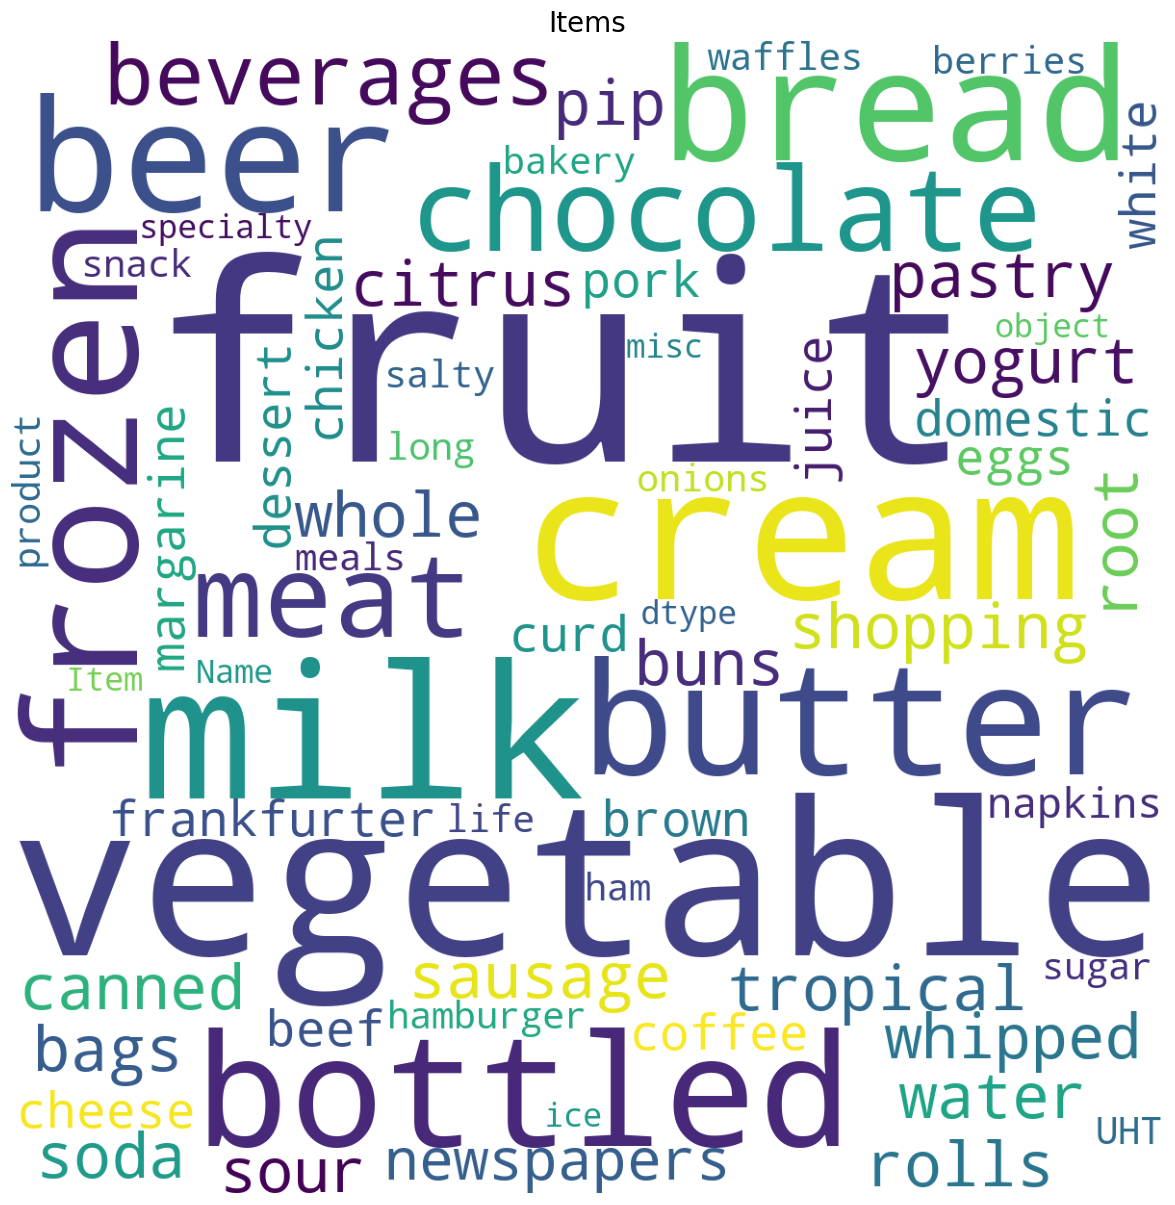

In [72]:
import matplotlib.pyplot as plt
import seaborn as sns

from wordcloud import WordCloud

plt.rcParams['figure.figsize'] = (15, 15)
wordcloud = WordCloud(background_color = 'white', width = 1200,  height = 1200, max_words = 121).generate(str(item['Item']))
plt.imshow(wordcloud)
plt.axis('off')
plt.title('Items',fontsize = 20)
plt.show()

In [73]:
fig = px.treemap(item, path=['Item'], values='Count')
fig.show()

In [74]:
from mlxtend.frequent_patterns import apriori, association_rules
import matplotlib.pyplot as plt

In [75]:
freq_items = apriori(transactions, min_support=0.001, use_colnames=True, verbose=1)
freq_items.head(7)

Processing 28 combinations | Sampling itemset size 4e 3


,support,itemsets
0,0.004010,(Instant food products)
1,0.021386,(UHT-milk)
2,0.001470,(abrasive cleaner)
3,0.001938,(artif. sweetener)
4,0.008087,(baking powder)
5,0.001136,(bathroom cleaner)
6,0.033950,(beef)


In [76]:
freq_items['length'] = freq_items['itemsets'].apply(lambda x: len(x))


In [77]:
freq_items.head(10)

,support,itemsets,length
0,0.004010,(Instant food products),1
1,0.021386,(UHT-milk),1
2,0.001470,(abrasive cleaner),1
3,0.001938,(artif. sweetener),1
4,0.008087,(baking powder),1
5,0.001136,(bathroom cleaner),1
6,0.033950,(beef),1
7,0.021787,(berries),1
8,0.016574,(beverages),1
9,0.045312,(bottled beer),1


In [78]:
freq_items.tail(10)

,support,itemsets,length
740,0.011161,"(whole milk, yogurt)",2
741,0.001136,"(other vegetables, soda, rolls/buns)",3
742,0.001203,"(other vegetables, whole milk, rolls/buns)",3
743,0.001136,"(other vegetables, whole milk, soda)",3
744,0.001136,"(other vegetables, whole milk, yogurt)",3
745,0.001136,"(whole milk, rolls/buns, sausage)",3
746,0.001002,"(soda, whole milk, rolls/buns)",3
747,0.001337,"(whole milk, rolls/buns, yogurt)",3
748,0.001069,"(soda, whole milk, sausage)",3
749,0.001470,"(whole milk, sausage, yogurt)",3


In [79]:
rules = association_rules(freq_items, metric="confidence", min_threshold=0.001)
rules.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
0,(bottled water),(UHT-milk),0.060683,0.021386,0.001069,0.017621,0.823954,1.0,-0.000228,0.996168,-0.185312,0.013201,-0.003847,0.033811
1,(UHT-milk),(bottled water),0.021386,0.060683,0.001069,0.050000,0.823954,1.0,-0.000228,0.988755,-0.179204,0.013201,-0.011373,0.033811
2,(other vegetables),(UHT-milk),0.122101,0.021386,0.002139,0.017515,0.818993,1.0,-0.000473,0.996060,-0.201119,0.015130,-0.003956,0.058758
3,(UHT-milk),(other vegetables),0.021386,0.122101,0.002139,0.100000,0.818993,1.0,-0.000473,0.975443,-0.184234,0.015130,-0.025175,0.058758
4,(rolls/buns),(UHT-milk),0.110005,0.021386,0.001804,0.016403,0.767013,1.0,-0.000548,0.994934,-0.254457,0.013925,-0.005092,0.050389


In [80]:
fig=px.scatter(rules['support'], rules['confidence'])
fig.update_layout(
    xaxis_title="support",
    yaxis_title="confidence",

    font_family="Courier New",
    font_color="blue",
    title_font_family="Times New Roman",
    title_font_color="red",
    title=('Support vs Confidence')

)

fig.show()

In [81]:
fig=px.scatter(rules['support'], rules['lift'])
fig.update_layout(
    xaxis_title="support",
    yaxis_title="lift",

    font_family="Courier New",
    font_color="blue",
    title_font_family="Times New Roman",
    title_font_color="red",
    title=('Support vs Confidence')

)

fig.show()

Text(0.5, 1.0, 'lift vs Confidence')

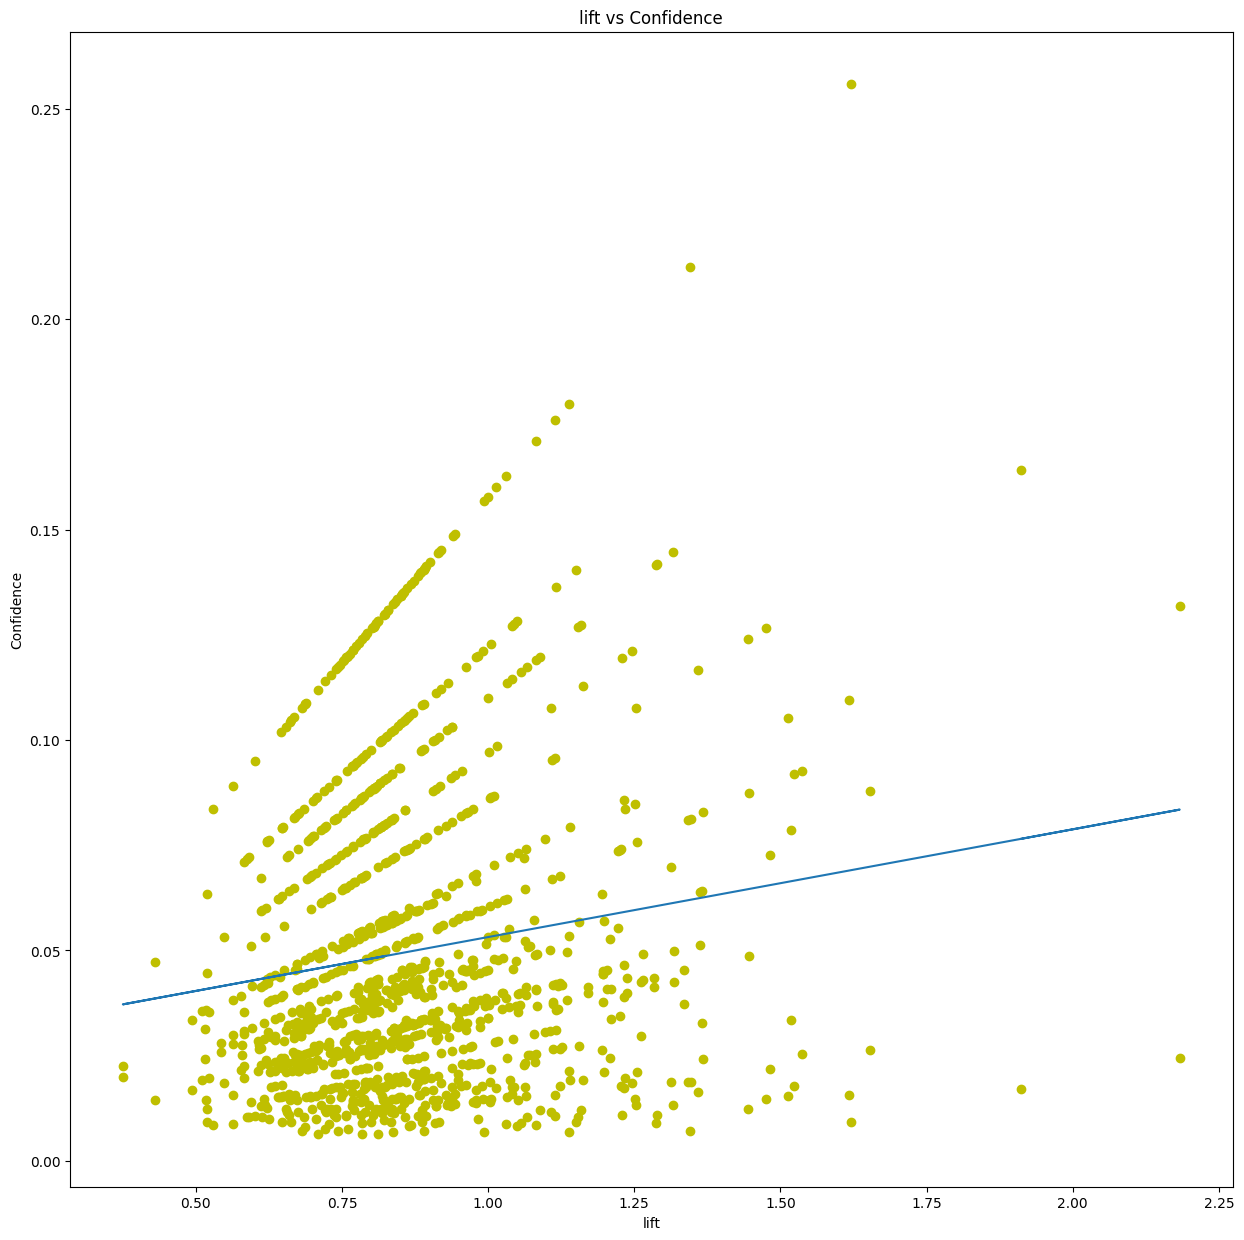

In [82]:
fit = np.polyfit(rules['lift'], rules['confidence'], 1)
fit_fn = np.poly1d(fit)
plt.plot(rules['lift'], rules['confidence'], 'yo', rules['lift'],
fit_fn(rules['lift']))
plt.xlabel('lift')
plt.ylabel('Confidence')
plt.title('lift vs Confidence')